# Análisis Exploratorio de Datos: Exploración de Datos Genéticos
Este notebook nos permitirá explorar los datos genétivos del estudio, provenientes de los archivos APOERES.csv y JANSSEN_PLASMA_P217_TAU.csv (de ADNI).

## Objetivos
1. ✅ Identificar la distribución y frecuencia de los genotipos APOE en la población de estudio.
2. ✅ Analizar las concentraciones de biomarcadores Tau y su variabilidad entre pacientes.
3. ✅ Detectar patrones temporales en los niveles de biomarcadores genéticos.
4. ✅ Examinar la relación entre genotipos APOE y concentraciones de Tau como posibles predictores de Alzheimer.
5. ✅ Evaluar la calidad de los datos genéticos e identificar valores faltantes o atípicos.
6. ✅ Establecer recomendaciones específicas para el preprocesamiento de datos genéticos.

***

In [8]:
print("Análisis Exploratorio de Datos Genéticos")
print("Proyecto de Detección Temprana de Alzheimer")
print("Fecha: ", pd.Timestamp.now().strftime("%Y-%m-%d"))

Análisis Exploratorio de Datos Genéticos
Proyecto de Detección Temprana de Alzheimer
Fecha:  2025-04-08


### Importar Librerías

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### Configuración de Visualización

In [22]:
# Configuración de estilos (actualizado)
sns.set_theme(style="whitegrid", font_scale=1.2)  # Reemplazo plt.style.use('seaborn') y sns.set()
plt.rcParams['figure.figsize'] = (12, 8)

# Suprimir advertencias
import warnings
warnings.filterwarnings('ignore')

### Cargar Datos

In [11]:
# Ruta a los archivos
data_path = "../data/raw/adni/genetics/"
apoeres_path = os.path.join(data_path, "APOERES.csv")
tau_path = os.path.join(data_path, "JANSSEN_PLASMA_P217_TAU.csv")

# Cargar archivos
try:
    apoeres_df = pd.read_csv(apoeres_path)
    print(f"✓ Archivo APOERES cargado: {apoeres_path}")
    print(f"  - Dimensiones: {apoeres_df.shape[0]} filas, {apoeres_df.shape[1]} columnas")
except FileNotFoundError:
    print(f"✗ Archivo no encontrado: {apoeres_path}")
    apoeres_df = None

try:
    tau_df = pd.read_csv(tau_path)
    print(f"✓ Archivo JANSSEN_PLASMA_P217_TAU cargado: {tau_path}")
    print(f"  - Dimensiones: {tau_df.shape[0]} filas, {tau_df.shape[1]} columnas")
except FileNotFoundError:
    print(f"✗ Archivo no encontrado: {tau_path}")
    tau_df = None

✓ Archivo APOERES cargado: ../data/raw/adni/genetics/APOERES.csv
  - Dimensiones: 2760 filas, 16 columnas
✓ Archivo JANSSEN_PLASMA_P217_TAU cargado: ../data/raw/adni/genetics/JANSSEN_PLASMA_P217_TAU.csv
  - Dimensiones: 130 filas, 9 columnas


### Exploración Inicial de los Conjuntos de Datos

##### APOE

In [37]:
# Información general
print("🟢INFORMACIÓN DE APOE")
display(apoeres_df.info())
# Estadísticas descriptivas
print("🟢ESTADÍSTICAS DESCRIPTIVAS")
display(apoeres_df.describe(include='all'))
# Primeras filas
print("🟢PRIMERAS FILAS")
display(apoeres_df.head())
# Columnas
print("🔎 Columnas: ")
print(apoeres_df.columns.tolist())

🟢INFORMACION DE APOE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PHASE         2760 non-null   object 
 1   PTID          2760 non-null   object 
 2   RID           2760 non-null   int64  
 3   VISCODE       1159 non-null   object 
 4   GENOTYPE      2760 non-null   object 
 5   APTESTDT      1159 non-null   object 
 6   APVOLUME      1159 non-null   float64
 7   APRECEIVE     1159 non-null   float64
 8   APAMBTEMP     1159 non-null   float64
 9   APRESAMP      1159 non-null   float64
 10  APUSABLE      1159 non-null   float64
 11  ID            1159 non-null   float64
 12  SITEID        1159 non-null   float64
 13  USERDATE      1159 non-null   object 
 14  USERDATE2     0 non-null      float64
 15  update_stamp  2760 non-null   object 
dtypes: float64(8), int64(1), object(7)
memory usage: 345.1+ KB


None

🟢ESTADISTICAS DESCRIPTIVAS


,PHASE,PTID,RID,VISCODE,GENOTYPE,APTESTDT,APVOLUME,APRECEIVE,APAMBTEMP,APRESAMP,APUSABLE,ID,SITEID,USERDATE,USERDATE2,update_stamp
count,2760,2760,2760.000000,1159,2760,1159,1159.00000,1159.000000,1159.000000,1159.0,1159.0,1159.000000,1159.000000,1159,0.0,2760
unique,5,2760,NaN,2,6,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127,NaN,140
top,ADNI1,011_S_0002,NaN,sc,3/3,2007-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-02-09,NaN,2014-10-21 15:16:48.0
freq,1159,1,NaN,822,1307,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,NaN,894
mean,NaN,NaN,3382.408333,NaN,NaN,NaN,8.48585,0.923210,0.999137,0.0,1.0,1170.334771,58.803279,NaN,NaN,NaN
std,NaN,NaN,2532.404542,NaN,NaN,NaN,1.59010,0.266373,0.029374,0.0,0.0,671.755753,45.364073,NaN,NaN,NaN
min,NaN,NaN,2.000000,NaN,NaN,NaN,1.00000,0.000000,0.000000,0.0,1.0,4.000000,1.000000,NaN,NaN,NaN
25%,NaN,NaN,861.750000,NaN,NaN,NaN,8.00000,1.000000,1.000000,0.0,1.0,593.000000,14.000000,NaN,NaN,NaN
50%,NaN,NaN,4161.000000,NaN,NaN,NaN,9.00000,1.000000,1.000000,0.0,1.0,1172.000000,44.000000,NaN,NaN,NaN
75%,NaN,NaN,6005.500000,NaN,NaN,NaN,9.50000,1.000000,1.000000,0.0,1.0,1751.000000,109.000000,NaN,NaN,NaN


🟢PRIMERAS FILAS


,PHASE,PTID,RID,VISCODE,GENOTYPE,APTESTDT,APVOLUME,APRECEIVE,APAMBTEMP,APRESAMP,APUSABLE,ID,SITEID,USERDATE,USERDATE2,update_stamp
0,ADNI1,011_S_0002,2,sc,3/3,2005-08-22,5.0,1.0,1.0,0.0,1.0,4.0,107.0,2005-08-23,NaN,2005-08-23 00:00:00.0
1,ADNI1,011_S_0003,3,sc,3/4,2005-08-22,10.0,1.0,1.0,0.0,1.0,6.0,107.0,2005-08-23,NaN,2005-08-23 00:00:00.0
2,ADNI1,022_S_0004,4,sc,3/3,2005-08-22,9.2,1.0,1.0,0.0,1.0,8.0,10.0,2005-08-23,NaN,2005-08-23 00:00:00.0
3,ADNI1,011_S_0005,5,sc,3/3,2005-08-29,10.0,1.0,1.0,0.0,1.0,10.0,107.0,2005-08-29,NaN,2005-08-29 00:00:00.0
4,ADNI1,022_S_0007,7,sc,3/4,2005-09-05,9.0,1.0,1.0,0.0,1.0,12.0,10.0,2005-09-06,NaN,2005-09-06 00:00:00.0


🔎 Columnas: 
['PHASE', 'PTID', 'RID', 'VISCODE', 'GENOTYPE', 'APTESTDT', 'APVOLUME', 'APRECEIVE', 'APAMBTEMP', 'APRESAMP', 'APUSABLE', 'ID', 'SITEID', 'USERDATE', 'USERDATE2', 'update_stamp']


In [39]:
# Valores Faltantes en APOE
print("🟢VALORES FALTANTES DE APOE")
missing_apoe = apoeres_df.isnull().sum()
missing_percent_apoe = (missing_apoe / len(apoeres_df)) * 100
missing_data_apoe = pd.concat([missing_apoe, missing_percent_apoe], axis=1, 
                           keys=['Total Missing', 'Percent Missing'])
missing_data_apoe = missing_data_apoe.round(2)
display(missing_data_apoe[missing_data_apoe['Total Missing'] > 0].sort_values('Total Missing', ascending=False))

🟢VALORES FALTANTES DE APOE


,Total Missing,Percent Missing
USERDATE2,2760,100.00
VISCODE,1601,58.01
APTESTDT,1601,58.01
APVOLUME,1601,58.01
APRECEIVE,1601,58.01
APAMBTEMP,1601,58.01
APRESAMP,1601,58.01
APUSABLE,1601,58.01
ID,1601,58.01
SITEID,1601,58.01


##### TAU

In [38]:
# Información general
print("🟢INFORMACIÓN DE TAU")
display(tau_df.info())
# Estadísticas descriptivas
print("🟢ESTADÍSTICAS DESCRIPTIVAS")
display(tau_df.describe(include='all'))
# Primeras filas
print("🟢PRIMERAS FILAS")
display(tau_df.head())
# Columnas
print("🔎 Columnas: ")
print(tau_df.columns.tolist())

🟢INFORMACION DE TAU
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PTID                     130 non-null    object 
 1   RID                      130 non-null    int64  
 2   EXAMDATE                 130 non-null    object 
 3   VISCODE2                 130 non-null    object 
 4   RUN                      130 non-null    int64  
 5   SAMPLE_ID                130 non-null    object 
 6   DILUTION_CORRECTED_CONC  130 non-null    float64
 7   CV                       128 non-null    object 
 8   update_stamp             130 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 9.3+ KB


None

🟢ESTADISTICAS DESCRIPTIVAS


,PTID,RID,EXAMDATE,VISCODE2,RUN,SAMPLE_ID,DILUTION_CORRECTED_CONC,CV,update_stamp
count,130,130.000000,130,130,130.000000,130,130.000000,128,130
unique,121,NaN,99,12,NaN,130,NaN,16,1
top,127_S_4604,NaN,2017-07-27,m48,NaN,GA80GN4N-09,NaN,1%,2024-01-25 20:11:34.0
freq,2,NaN,3,63,NaN,1,NaN,17,130
mean,NaN,3820.984615,NaN,NaN,2.615385,NaN,0.076523,NaN,NaN
std,NaN,1528.940881,NaN,NaN,1.216072,NaN,0.056024,NaN,NaN
min,NaN,31.000000,NaN,NaN,1.000000,NaN,0.012000,NaN,NaN
25%,NaN,4127.750000,NaN,NaN,2.000000,NaN,0.034000,NaN,NaN
50%,NaN,4488.500000,NaN,NaN,3.000000,NaN,0.060000,NaN,NaN
75%,NaN,4774.500000,NaN,NaN,4.000000,NaN,0.102500,NaN,NaN


🟢PRIMERAS FILAS


,PTID,RID,EXAMDATE,VISCODE2,RUN,SAMPLE_ID,DILUTION_CORRECTED_CONC,CV,update_stamp
0,128_S_0138,138,2016-02-18,m120,1,GA80GN4N-09,0.140,4%,2024-01-25 20:11:34.0
1,126_S_1187,1187,2016-01-27,m108,1,HA80GLG5-08,0.133,4%,2024-01-25 20:11:34.0
2,023_S_0031,31,2016-01-27,m120,1,AA80GLLT-09,0.081,1%,2024-01-25 20:11:34.0
3,018_S_4399,4399,2016-01-07,m48,1,JA80GLZ1-09,0.055,9%,2024-01-25 20:11:34.0
4,033_S_4176,4176,2016-01-06,m48,1,CA80GLWP-10,0.200,2%,2024-01-25 20:11:34.0


🔎 Columnas: 
['PTID', 'RID', 'EXAMDATE', 'VISCODE2', 'RUN', 'SAMPLE_ID', 'DILUTION_CORRECTED_CONC', 'CV', 'update_stamp']


In [40]:
# Valores Faltantes en Tau
print("🟢VALORES FALTANTES DE TAU")
missing_tau = tau_df.isnull().sum()
missing_percent_tau = (missing_tau / len(tau_df)) * 100
missing_data_tau = pd.concat([missing_tau, missing_percent_tau], axis=1, 
                          keys=['Total Missing', 'Percent Missing'])
# Redondea el porcentaje a dos decimales
missing_data_tau = missing_data_tau.round(3)
display(missing_data_tau[missing_data_tau['Total Missing'] > 0].sort_values('Total Missing', ascending=False))

🟢VALORES FALTANTES DE TAU


,Total Missing,Percent Missing
CV,2,1.538


### Análisis Específicos de APOE

GENOTYPE
3/3    1307
3/4     936
4/4     248
2/3     202
2/4      60
2/2       7
Name: count, dtype: int64

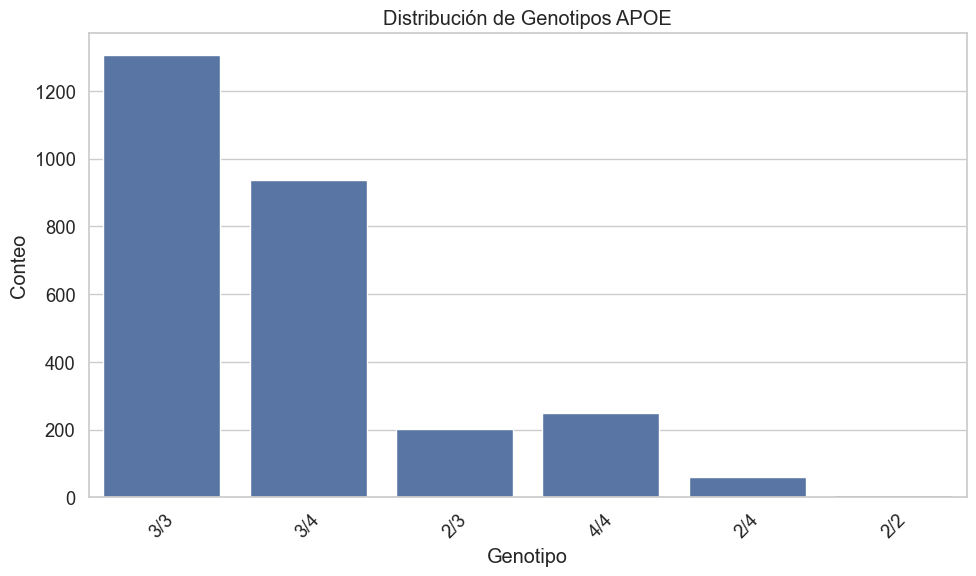

<Figure size 1200x800 with 0 Axes>

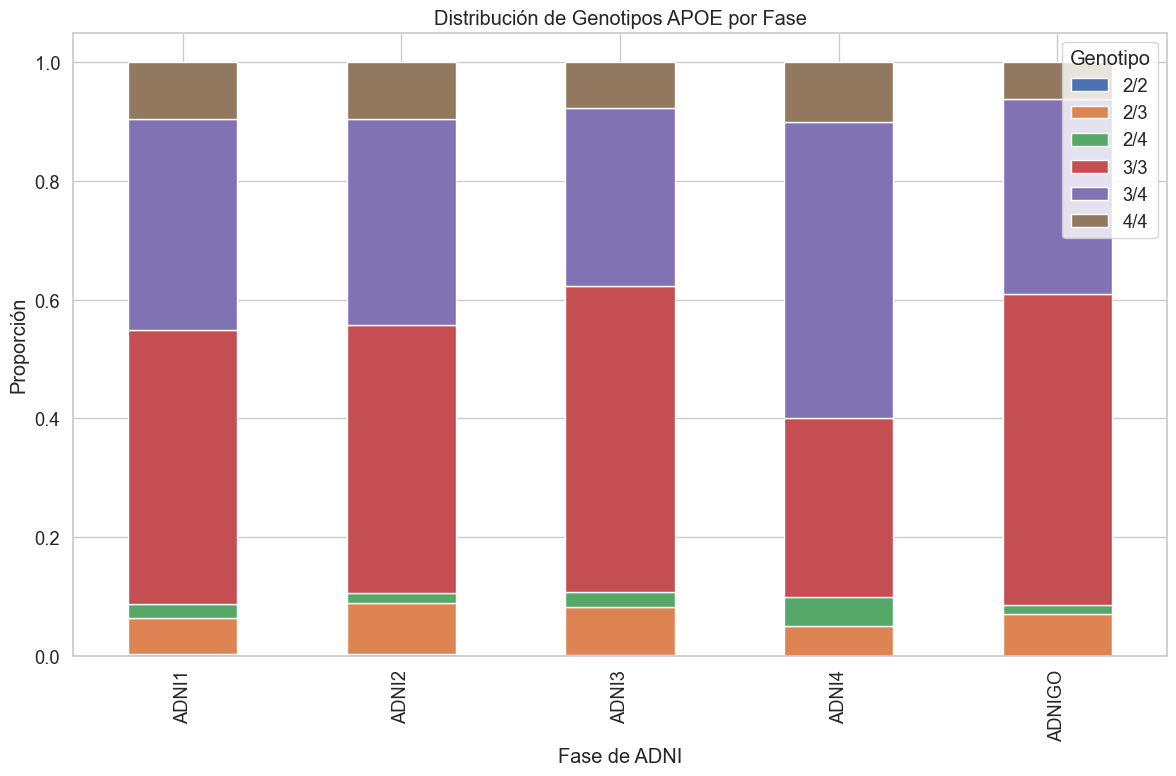

In [54]:
# Distribución de genotipos APOE
genotype_counts = apoeres_df['GENOTYPE'].value_counts()
display(genotype_counts)
    
plt.figure(figsize=(10, 6))
sns.countplot(x='GENOTYPE', data=apoeres_df)
plt.title('Distribución de Genotipos APOE')
plt.xlabel('Genotipo')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
    
# Analizar APOE por fase o visita
if 'PHASE' in apoeres_df.columns and 'GENOTYPE' in apoeres_df.columns:
    plt.figure(figsize=(12, 8))
    crosstab = pd.crosstab(apoeres_df['PHASE'], apoeres_df['GENOTYPE'], normalize='index')
    crosstab.plot(kind='bar', stacked=True)
    plt.title('Distribución de Genotipos APOE por Fase')
    plt.xlabel('Fase de ADNI')
    plt.ylabel('Proporción')
    plt.legend(title='Genotipo')
    plt.tight_layout()
    plt.show()

De estos gráficos se desprende que el genotipo con más apariciones en nuestro conjunto de datos es el genotipo 3/3, con 1307 apariciones, muy por encima de por ejemplo el genotipo 2/2 o 2/4 (con 7 y 60 participantes respectivamente). Esto podría desembocar en futuros sesgos en nuestros modelos.


Distribución de usabilidad de muestras APOE:


APUSABLE
1.0    1159
Name: count, dtype: int64

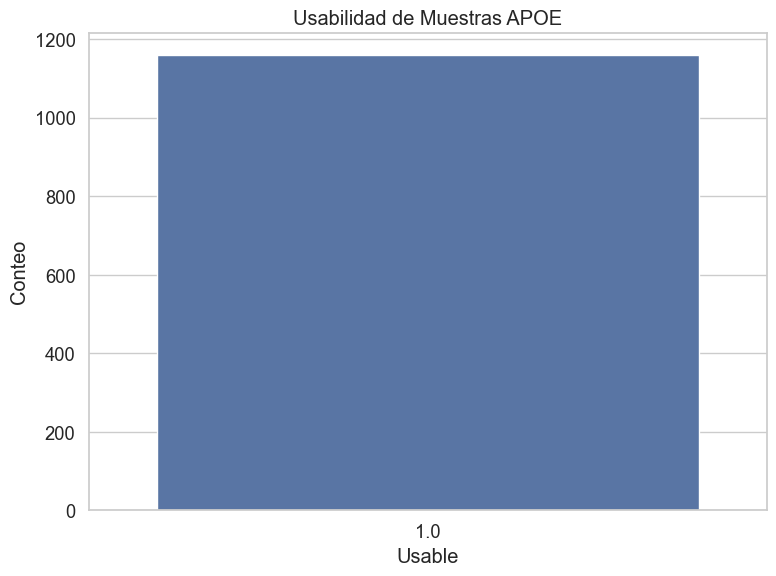

In [45]:
# Análisis de usabilidad de muestras APOE
print("\nDistribución de usabilidad de muestras APOE:")
usable_counts = apoeres_df['APUSABLE'].value_counts()
display(usable_counts)
    
plt.figure(figsize=(8, 6))
sns.countplot(x='APUSABLE', data=apoeres_df)
plt.title('Usabilidad de Muestras APOE')
plt.xlabel('Usable')
plt.ylabel('Conteo')
plt.tight_layout()
plt.show()

### Análisis específico de Tau

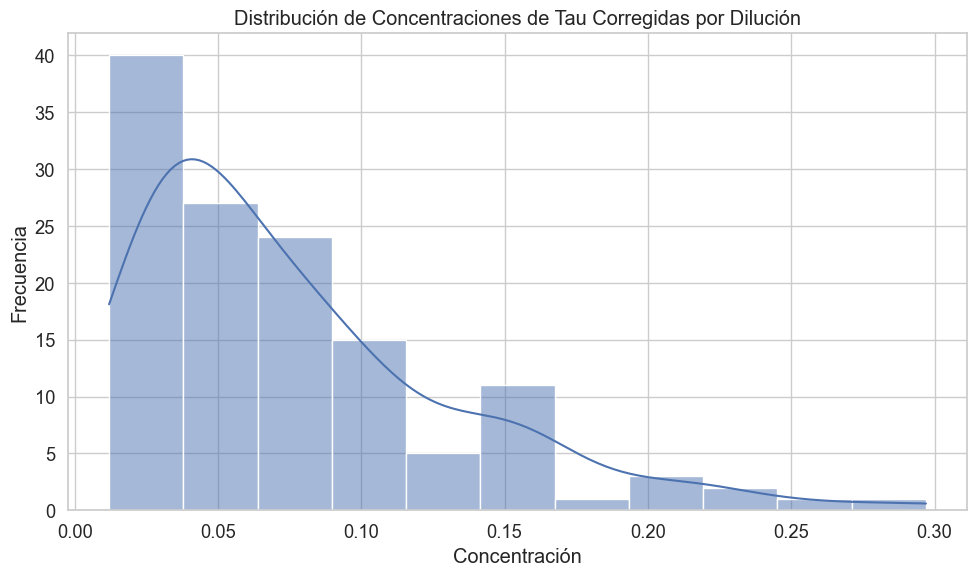

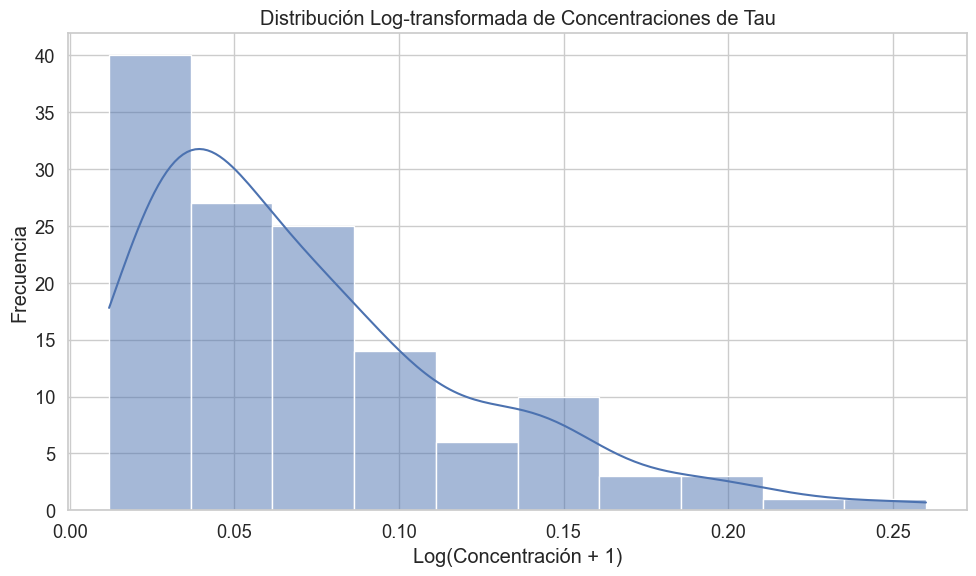

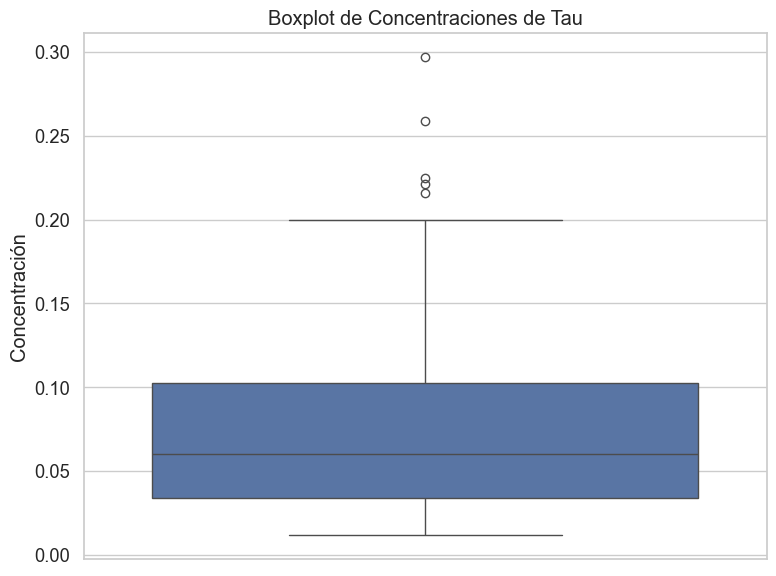

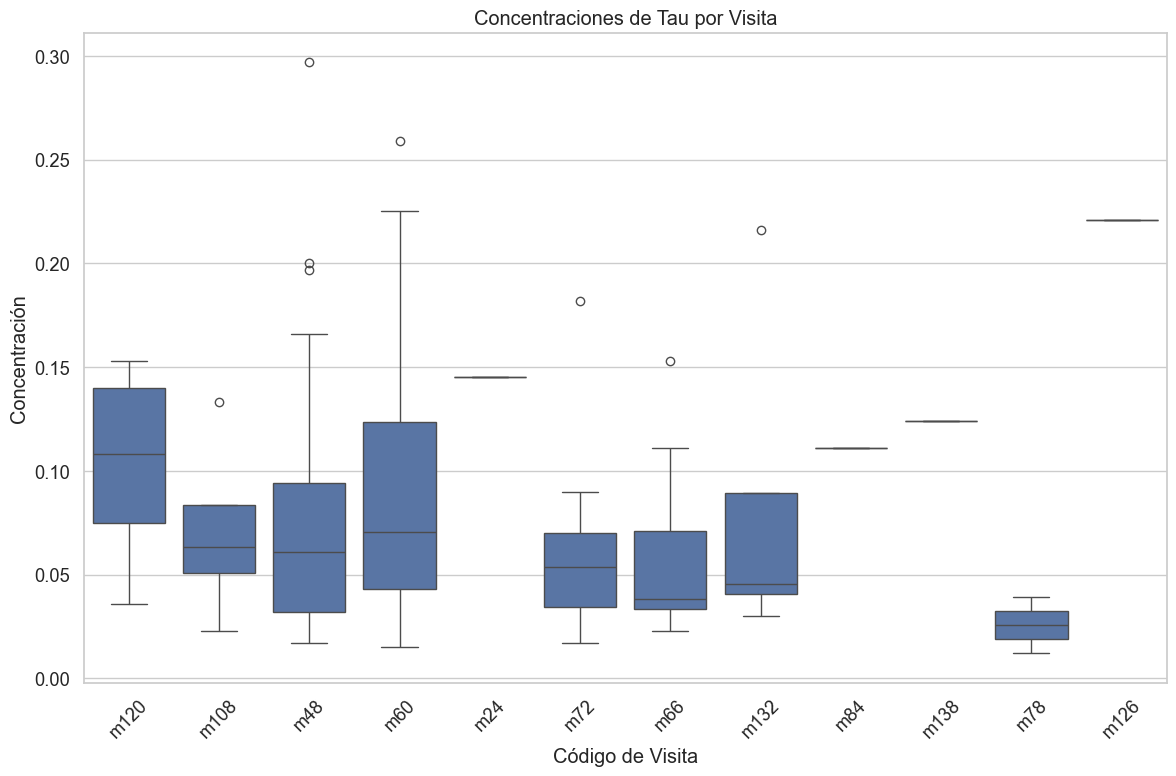

In [46]:
# Distribución de concentraciones de Tau
if 'DILUTION_CORRECTED_CONC' in tau_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(tau_df['DILUTION_CORRECTED_CONC'].dropna(), kde=True)
    plt.title('Distribución de Concentraciones de Tau Corregidas por Dilución')
    plt.xlabel('Concentración')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()
    
    # Log-transformación para mejor visualización
    plt.figure(figsize=(10, 6))
    sns.histplot(np.log1p(tau_df['DILUTION_CORRECTED_CONC'].dropna()), kde=True)
    plt.title('Distribución Log-transformada de Concentraciones de Tau')
    plt.xlabel('Log(Concentración + 1)')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()
    
    # Análisis de outliers con boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=tau_df['DILUTION_CORRECTED_CONC'].dropna())
    plt.title('Boxplot de Concentraciones de Tau')
    plt.ylabel('Concentración')
    plt.tight_layout()
    plt.show()
    
    # Análisis por visita
    if 'VISCODE2' in tau_df.columns:
        plt.figure(figsize=(12, 8))
        sns.boxplot(x='VISCODE2', y='DILUTION_CORRECTED_CONC', data=tau_df)
        plt.title('Concentraciones de Tau por Visita')
        plt.xlabel('Código de Visita')
        plt.ylabel('Concentración')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

De estos gráficos se desprende que: 
1. En cuanto a la distribución de TAU, a medida que se observa menores concentraciones de Tau por consiguiente se observa mayor frecuencia de participantes, y a mayor concentraciones de Tau, menor frecuencia de participantes.
2. Tenemos valores atípicos en las concentraciones de Tau, que van desde el 0.20 hasta antes del 0.30.


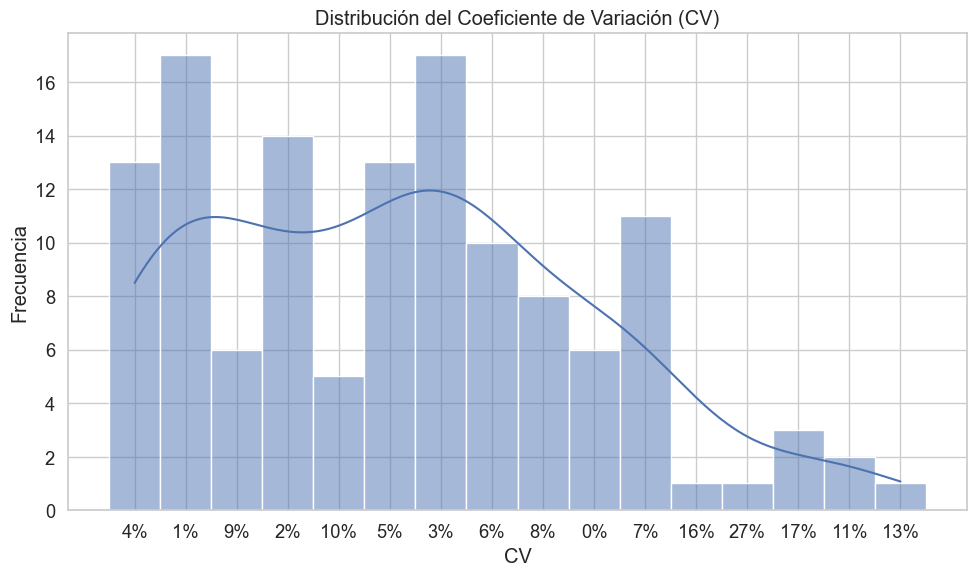

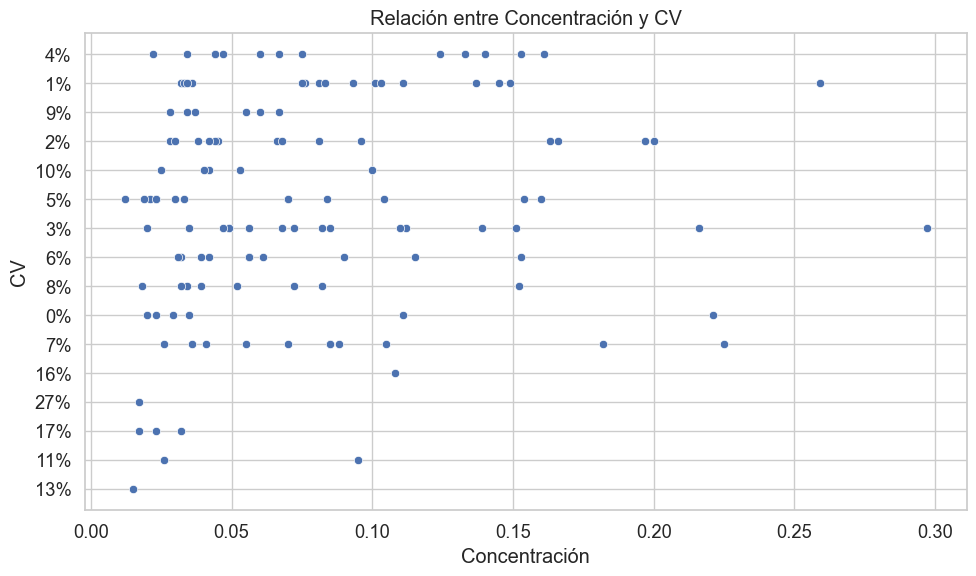

In [48]:
# Análisis de CV (Coeficiente de Variación)
plt.figure(figsize=(10, 6))
sns.histplot(tau_df['CV'].dropna(), kde=True)
plt.title('Distribución del Coeficiente de Variación (CV)')
plt.xlabel('CV')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()
    
# Relación entre CV y concentración
if 'DILUTION_CORRECTED_CONC' in tau_df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='DILUTION_CORRECTED_CONC', y='CV', data=tau_df)
    plt.title('Relación entre Concentración y CV')
    plt.xlabel('Concentración')
    plt.ylabel('CV')
    plt.tight_layout()
    plt.show()

Como conclusión de estos grafico puedo decir que he observado:
1. Respecto a la distribución se observa una asimetría positiva (Sesgo a la derecha).
2. La mayoría de las concentraciones de Tau están ubicadas en el rango de 0% a 10% de CV inclusive.
3. Esto ultimo quiere decir que los datos de concentracion tienen baja variabilidad, lo que se traduce en datos concistentes.
4. Los datos con CV > 15% presentan posible heterogeneidad o posibles errores de medición en ciertos casos.

### Análisis Relacional - Fusión de datos para análisis de relaciones APOE-Tau


Se encontraron 130 coincidencias entre los datasets de APOE y Tau


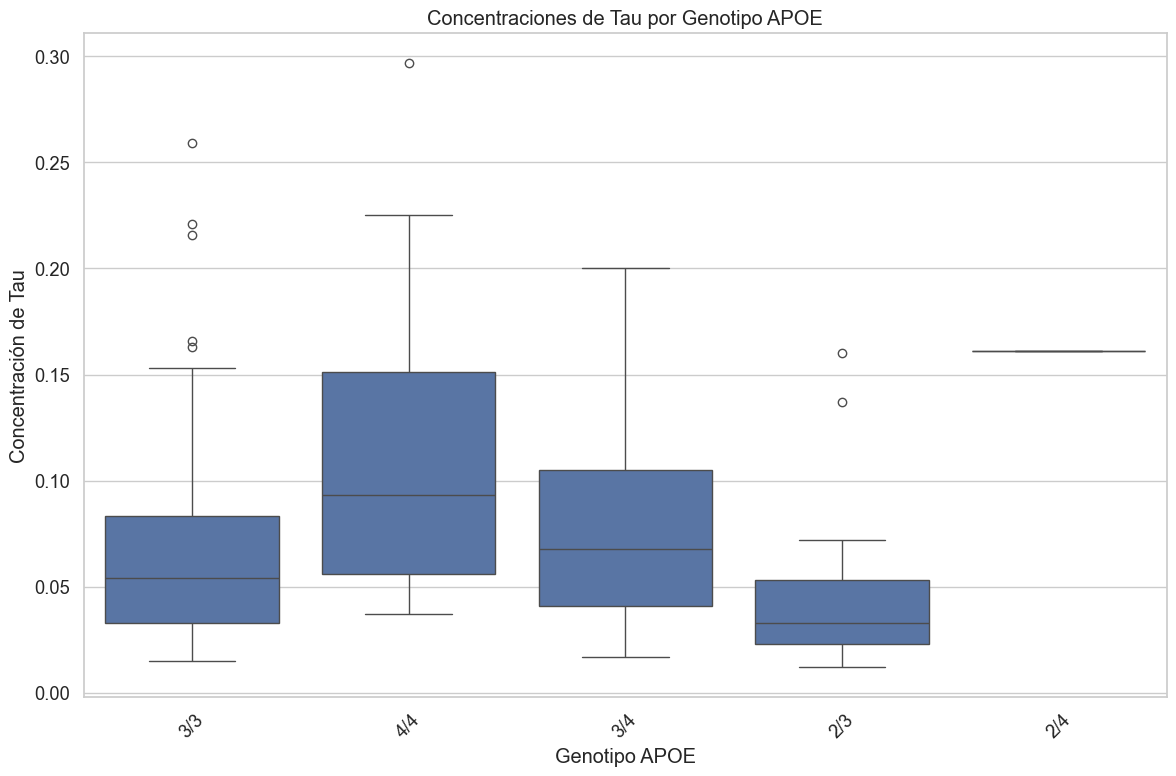

In [50]:
# Intentamos fusionar los datasets por identificador de paciente
if 'PTID' in apoeres_df.columns and 'PTID' in tau_df.columns:
    # Esto es un ejemplo básico, la fusión real podría ser más compleja
    merged_df = pd.merge(apoeres_df, tau_df, on='PTID', how='inner', suffixes=('_apoe', '_tau'))
    
    print(f"\nSe encontraron {merged_df.shape[0]} coincidencias entre los datasets de APOE y Tau")
    
    if merged_df.shape[0] > 0 and 'GENOTYPE' in merged_df.columns and 'DILUTION_CORRECTED_CONC' in merged_df.columns:
        plt.figure(figsize=(12, 8))
        sns.boxplot(x='GENOTYPE', y='DILUTION_CORRECTED_CONC', data=merged_df)
        plt.title('Concentraciones de Tau por Genotipo APOE')
        plt.xlabel('Genotipo APOE')
        plt.ylabel('Concentración de Tau')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print("No se pueden relacionar los datasets porque no comparten identificadores comunes.")

De este análisis se desprende:
1. El genotipo individual APOE e4 es el que mayoritariamente se correlaciona con niveles altos de concentraciones Tau, como se puede ver en el gráfico de caja de arriba en los genotipos 4/4, 3/4 y 2/4.
2. El genotipo APOE  4/4 es el que tiene el mayor y mas alto rango de concentraciones Tau (0.3 a 0.23 aproximadamente). 

### Análisis Temporal

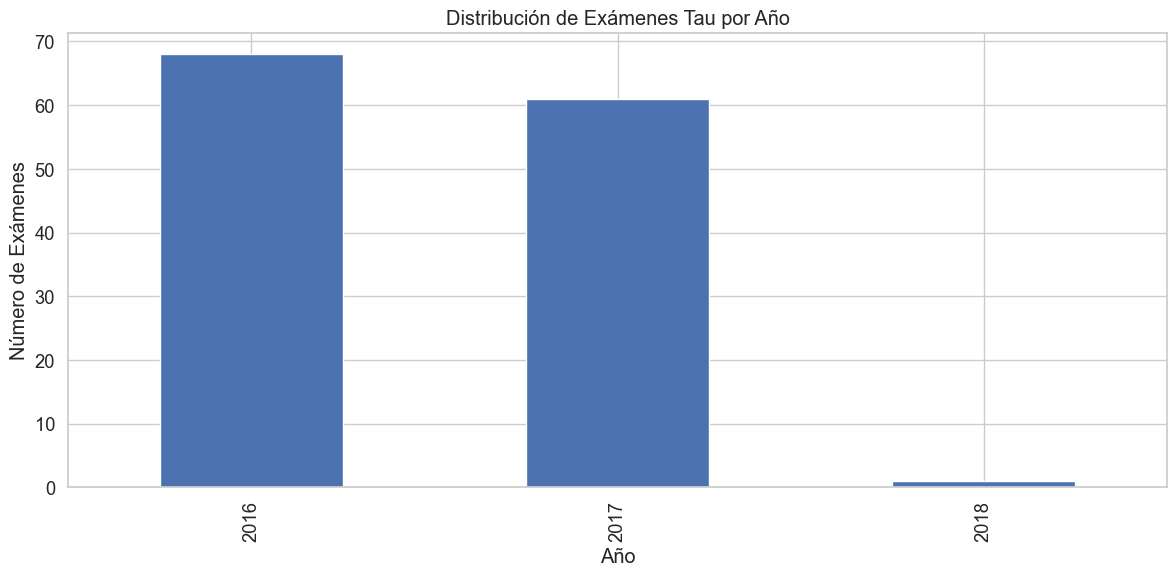

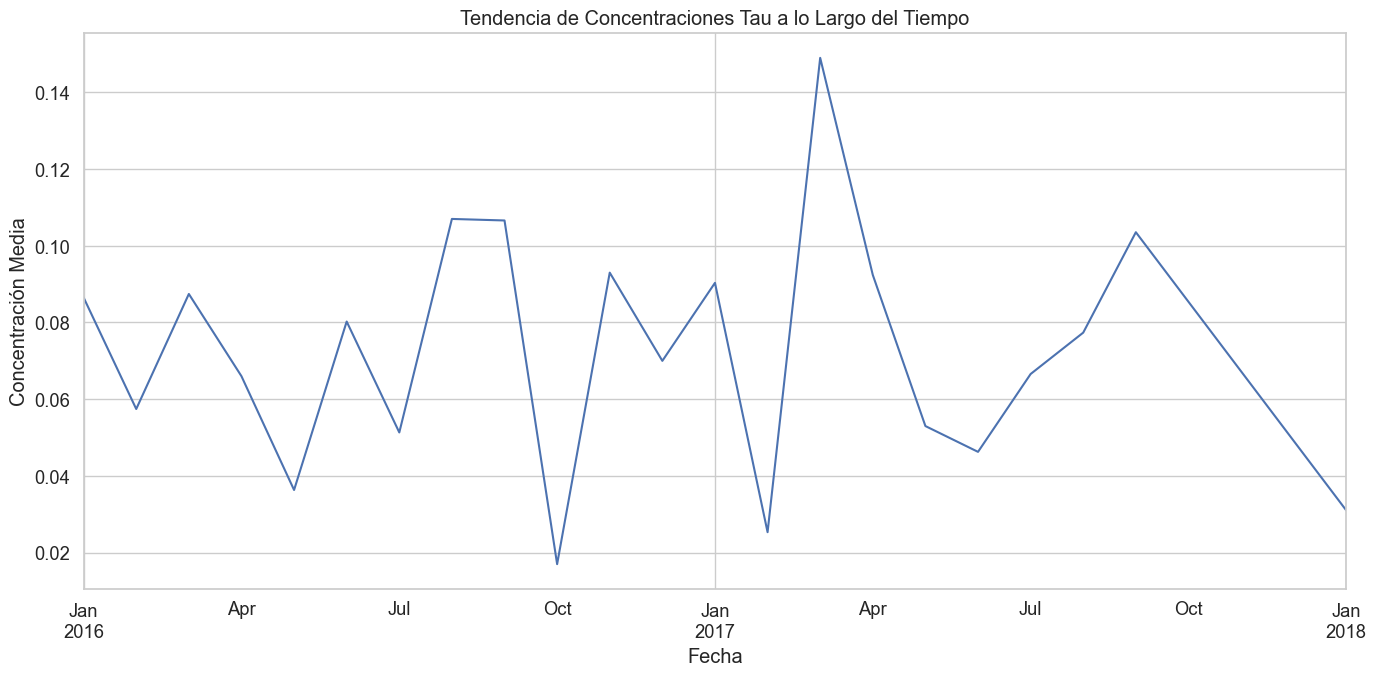

In [51]:
# Análisis de fechas de examen para Tau
if 'EXAMDATE' in tau_df.columns:
    # Convertir a datetime
    tau_df['EXAMDATE'] = pd.to_datetime(tau_df['EXAMDATE'], errors='coerce')
    
    # Ordenar por fecha y mostrar distribución
    plt.figure(figsize=(12, 6))
    tau_df['EXAMDATE'].dt.year.value_counts().sort_index().plot(kind='bar')
    plt.title('Distribución de Exámenes Tau por Año')
    plt.xlabel('Año')
    plt.ylabel('Número de Exámenes')
    plt.tight_layout()
    plt.show()
    
    # Tendencia de concentraciones a lo largo del tiempo
    if 'DILUTION_CORRECTED_CONC' in tau_df.columns:
        plt.figure(figsize=(14, 7))
        df_temporal = tau_df.dropna(subset=['EXAMDATE', 'DILUTION_CORRECTED_CONC'])
        df_temporal = df_temporal.sort_values('EXAMDATE')
        
        # Agrupación por mes para suavizar la visualización
        df_temporal['month_year'] = df_temporal['EXAMDATE'].dt.to_period('M')
        monthly_mean = df_temporal.groupby('month_year')['DILUTION_CORRECTED_CONC'].mean()
        
        monthly_mean.plot()
        plt.title('Tendencia de Concentraciones Tau a lo Largo del Tiempo')
        plt.xlabel('Fecha')
        plt.ylabel('Concentración Media')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

De estos gráficos se puede observar:
1. Las muestras de concentraciones Tau de nuestro conjunto de datos fueron recolectadas entre los años 2016, 2017 y 2018.
2. La mayoría de las muestras fueron recolectadas en 2016/17.
3. En Octubre de 2016 se registro un pico mínimo en la media de las concentraciones de Tau (0.02 aproximadamente).
4. En Marzo de 2017 aproximadamente se registro un pico máximo en la media de las concentraciones de Tau (0.15 aproximadamente).

### Resumen de Hallazgos

#### Principales Hallazgos del Análisis Exploratorio de Datos Genéticos

##### Datos APOE
- De estos gráficos se desprende que el genotipo con más apariciones en nuestro conjunto de datos es el genotipo 3/3, con 1307 apariciones, muy por encima de por ejemplo el genotipo 2/2 o 2/4 (con 7 y 60 participantes respectivamente). Esto podría desembocar en futuros sesgos en nuestros modelos.
- A lo largo de todas las fases de ADNI se observa casi ningun casos de genotipo 2/2. Por su parte de los genotipos 2/3, 2/4 y 4/4 se observan pocas muestras en relacion con los genotipos 3/4 y 3/3.
- La calidad de los datos es buena ya que observamos buenos niveles de usabilidad en APOE.

##### Datos Tau
- En cuanto a la distribución de TAU, a medida que se observa menores concentraciones de Tau por consiguiente se observa mayor frecuencia de participantes, y a mayor concentraciones de Tau, menor frecuencia de participantes.
- La mayoría de las concentraciones de Tau están ubicadas en el rango de 0% a 10% de CV inclusive. Esto ultimo quiere decir que los datos de concentracion tienen baja variabilidad, lo que se traduce en datos concistentes.
- Las muestras de concentraciones Tau de nuestro conjunto de datos fueron recolectadas entre los años 2016, 2017 y 2018. Y mayoría de las muestras fueron recolectadas en 2016/17.

##### Relaciones APOE-Tau
- El genotipo individual APOE e4 es el que mayoritariamente se correlaciona con niveles altos de concentraciones Tau, como se puede ver en el gráfico de caja de arriba en los genotipos 4/4, 3/4 y 2/4.
- El genotipo APOE  4/4 es el que tiene el mayor y mas alto rango de concentraciones Tau (0.3 a 0.23 aproximadamente). 

##### Recomendaciones para Preprocesamiento
1. Tratamiento de valores atípicos
Para las concentraciones de Tau (DILUTION_CORRECTED_CONC):
    - Aplicar el método IQR (Rango Intercuartil) para identificar outliers, considerando como atípicos los valores que estén por encima de Q3 + 1.5IQR o por debajo de Q1 - 1.5IQR.
    - Para valores extremadamente altos (>3 desviaciones estándar de la media), verificar si corresponden a errores de medición
    - En lugar de eliminar los outliers, considerar winsorización (reemplazar los valores extremos por el percentil 5 y 95) para preservar la estructura de los datos
2. Imputación de valores faltantes
    - Para valores faltantes en APUSABLE y otras variables categóricas, utilizar la moda como estrategia de imputación
    - Para valores faltantes en CV y DILUTION_CORRECTED_CONC, aplicar imputación KNN (k-Nearest Neighbors) con k=5, considerando pacientes con características similares
    - Documentar el porcentaje de datos imputados para cada variable y realizar análisis de sensibilidad antes y después de la imputación
    - Para pacientes sin datos APOE, no imputar el genotipo debido a su importancia biológica; marcar como "desconocido" o excluir del análisis específico
3. Transformaciones necesarias
    - Aplicar transformación logarítmica (log1p) a las concentraciones de Tau para normalizar su distribución asimétrica
    - Codificar los genotipos APOE en variables dummy para análisis multivariado
    - Convertir fechas (EXAMDATE, APTESTDT) a formato datetime estandarizado y extraer características temporales como año, mes y día
    - Calcular variables derivadas como el tiempo desde el primer examen para análisis longitudinales
4. Estrategia de normalización propuesta
    - Para DILUTION_CORRECTED_CONC y otras variables numéricas continuas, aplicar normalización Min-Max para escalar al rango [0,1]
    - Estratificar la normalización por grupos de edad para mantener diferencias biológicamente relevantes entre grupos etarios
    - Mantener versiones tanto normalizadas como originales de las variables para verificar robustez en modelos posteriores
    - Para análisis de series temporales, normalizar valores dentro de cada paciente (z-score por paciente) para enfocarse en cambios relativos